# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

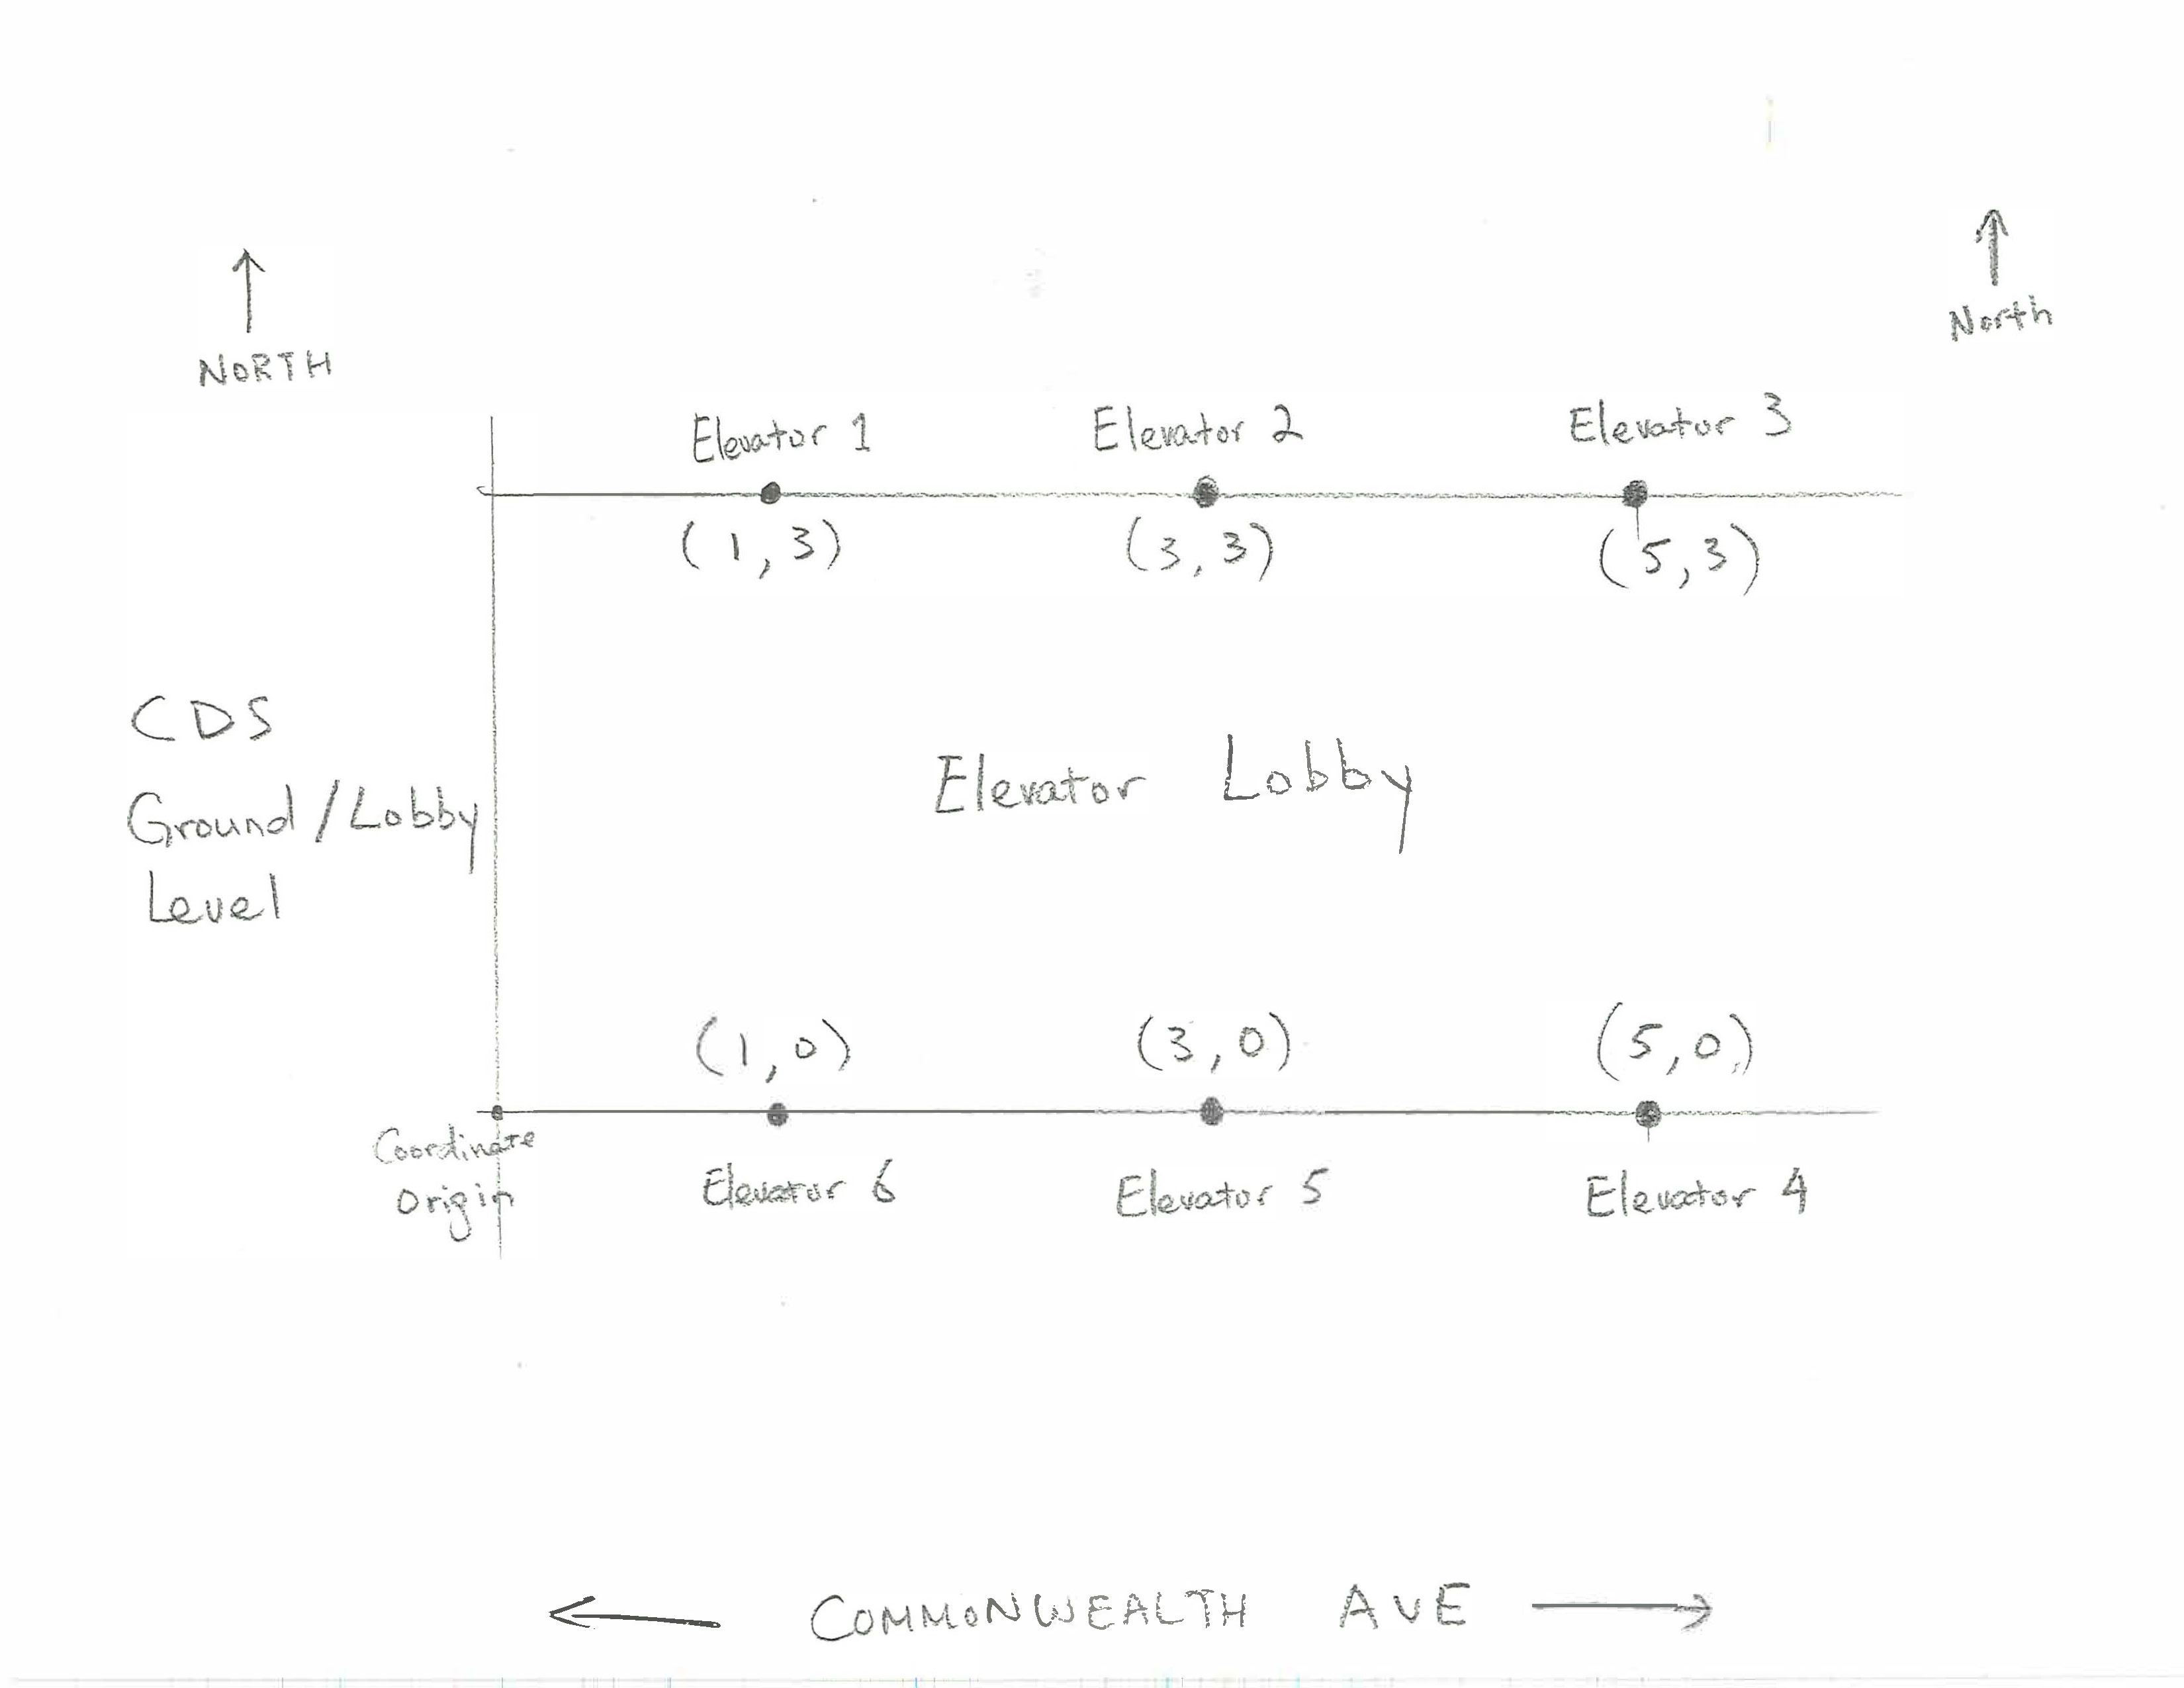

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** You should stand in the very middle of the elavator cordinate system in order to minimize walking distance to each elevator. This would be at the coridnate (3,1.5) and standing at this point would minimize the overall walking distance if each elevator has the same equal chance of arriving.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

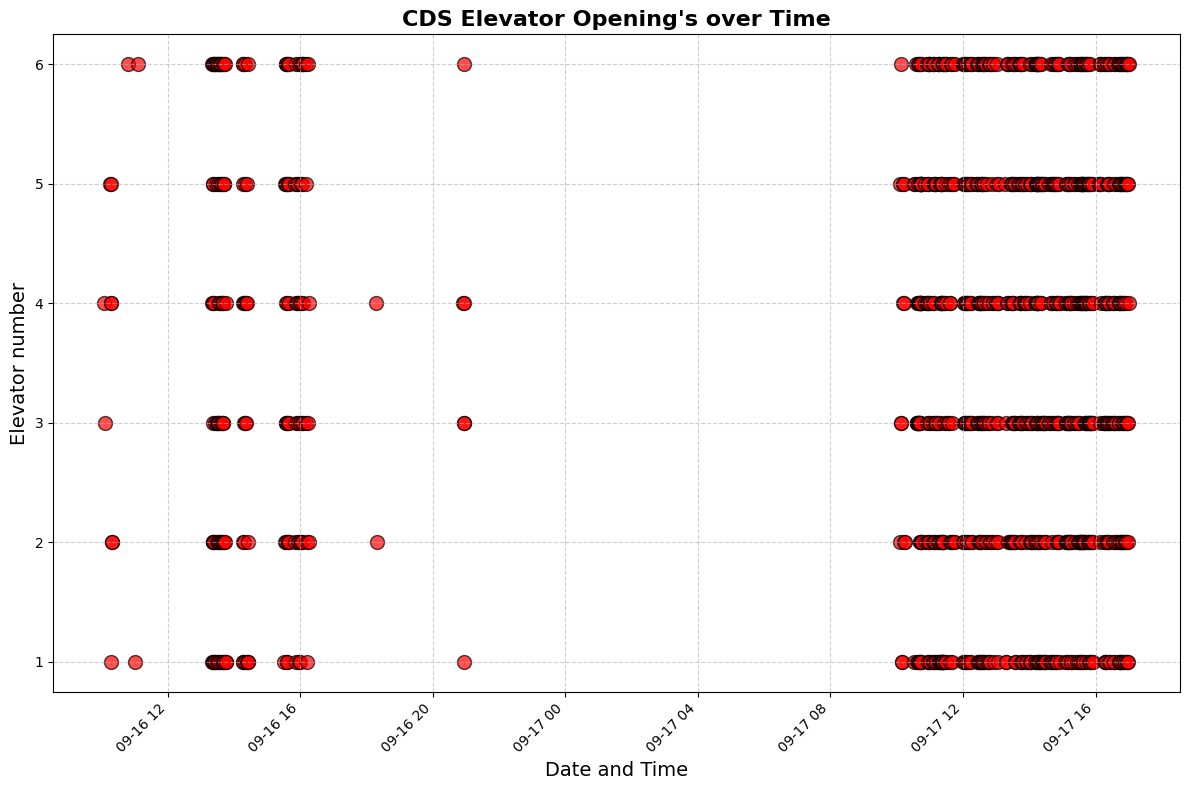

In [4]:
# Code for question 1:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TrainingData.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    x = df["Timestamp"]
    y = df["Elevator ID"]

    plt.figure(figsize=(12, 8))  
    plt.scatter(x, y, color="red", marker="o", s=100, edgecolor="black", alpha=0.7) 
    plt.xticks(rotation=45, ha="right")  
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel("Date and Time", fontsize=14)
    plt.ylabel("Elevator number", fontsize=14)
    plt.title("CDS Elevator Opening's over Time", fontsize=16, fontweight="bold")

    plt.tight_layout()
    plt.show()

make_plot()

All of the elevators seem to be on around the same cycle of amount of times they open over a given period of time. 9/17 have more data points than 9/16 but that is probably because many people signed to up to collect data on 9/17 compared to 9/16 not because each elevator opened signifigantly less during 9/16.


**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [37]:
# Write any data processing code you need here
import numpy as np
Total_Time_Measured_S = df["Email Address"].nunique()*5*60
Total_Time_Measured_S
Arrivals = df.groupby("Elevator ID").size()
Frequency = np.round((Arrivals/Total_Time_Measured_S),6)
Frequency



Elevator ID
1    0.005871
2    0.006136
3    0.006439
4    0.006364
5    0.006326
6    0.006023
dtype: float64

In [20]:
Arrivals

Elevator ID
1    155
2    162
3    170
4    168
5    167
6    159
dtype: int64

**Answer:**The optiminal location based on this data could change from my original optimial location. Based on this data the elevators arrive more frequently for elevators 3,4,5 which are all pretty close each other. Because of this the most optimal could be stadning equally distant away from elavotrs 3,4, and 5. This point could be around (3.5,1.5).

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 26400 | 26400 | 26400 | 26400 | 26400 |26400 |
| Number of arrivals | 155 | 162 | 170 | 168 | 167 |159 |
| Average frequency (arrivals per second) | 0.005871 | 0.006136 | 0.006439 | 0.006364 |  0.006326 |0.006023 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

In [29]:
total_arrivals = sum(Arrivals)
Expected = np.round(Arrivals/total_arrivals,4)
Expected



Elevator ID
1    0.1580
2    0.1651
3    0.1733
4    0.1713
5    0.1702
6    0.1621
dtype: float64

**Answer:** Elevator 3 would be the most likely to arrive because it has the highest arrival rate out of all the elavators. If you sum up all the total arrivals across all elevators and the divide each elevators number of arrivals by the total, you get the percentage chance for each elevator. Elevator 3 slightly has the highest chance at 17.33%

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.1580 | 0.1651 | 0.1733 | 0.1713 | 0.1702 |0.1621 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


In [56]:
x_cords = [1.0,3.0,5.0,5.0,3.0,1.0]
y_cords = [3.0,3.0,3.0,0.0,0.0,0]
x_optimal = np.round(sum(Expected*x_cords),4)
y_optimal = np.round(sum(Expected*y_cords),4)
print("Optimal x: " + str(x_optimal) + ", Optimal y: " + str(y_optimal))

Optimal x: 3.049, Optimal y: 1.4892


**Answer:** (3.049,1.4892). This coordinate (3.049,1.4892) is the most optimal location to stand to mimize walking distance when waiting for a elevator because it considereds the probability of each elevator arriving for each coordinate points to determine where to stand in order to maximize the probability that you are near an elevator that opens next.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [46]:
x_target, y_target = 3.0, 1.5
distances = np.sqrt((np.array(x_cords) - x_target)**2 + (np.array(y_cords) - y_target)**2)

coordinates = {
    1: (1, 3),2: (3, 3),3: (5, 3),4: (5, 0),5: (3, 0),6: (1, 0)
}
def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the data.
    coordinate is the coordinate to wait at.
    '''
    df = pd.read_csv(data)
    distances = []
    for index, row in df.iterrows():
        elevator_num = row['Elevator ID']
        E_coordinate = coordinates[elevator_num]
        distance = np.sqrt((coordinate[0] - E_coordinate[0])**2 + (coordinate[1] - E_coordinate[1])**2)
        distances.append(distance)

    average_walk_distance = np.mean(distances)      
    return average_walk_distance

# example usage
print(get_average_walk_distance('TrainingData.csv', (3,1.5)))
print(get_average_walk_distance('TrainingData.csv', (x_optimal,y_optimal)))

2.1646279306829768
2.163994556705607


**Answer:** Average Walk Distance for Q1 Coordinate (3,1.5) is 2.16462. Average Walk Distance for Optimial Calculated Coordinate (3.049,1.4892) is 2.16399

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (3.0,1.5) | 2.16315 |   2.16315 |
|Smart position (3.049,1.4892) | 2.16399 |   2.16288 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Yes I have succeeded in finidng a good location to wait for the elevators. The optimal selected waiting coordinate (3.049,1.4892) provides a average walking distance of 2.16288 which is less than the Q1 Point (3.0,1.5) average walking distance of 2.16315

In [49]:
df2 = pd.read_csv("TestingData.csv")
print(get_average_walk_distance('TestingData.csv', (3.0,1.5)))
print(get_average_walk_distance('TestingData.csv', (x_optimal,y_optimal)))

2.163157894736842
2.1628837353450123
